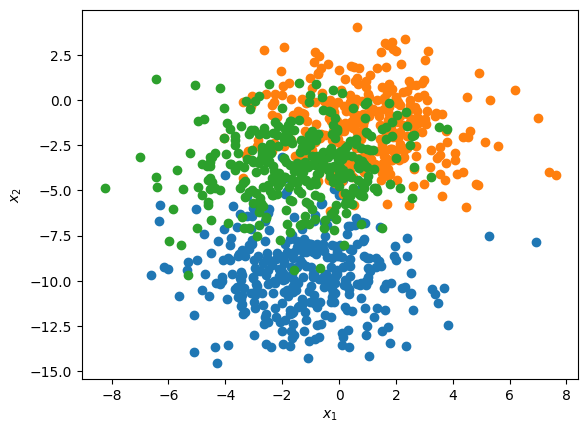

16/16 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8360


Test Accuracy: 0.836
16/16 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8240


Test Accuracy: 0.824
16/16 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8260


Test Accuracy: 0.826
16/16 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8200
Test Accuracy: 0.820


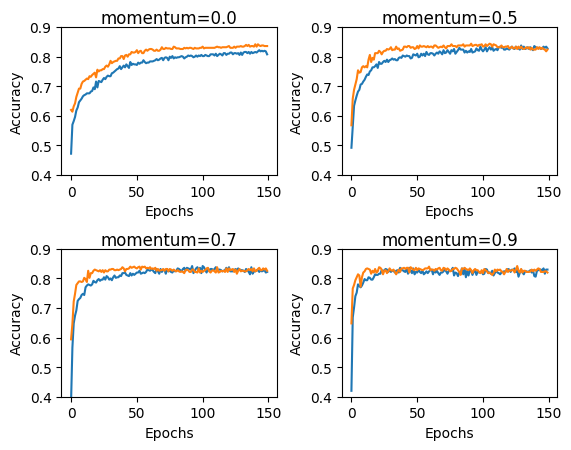

In [1]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras import initializers
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from numpy import where

# Part 1: Creating pseudo-random dataset & display with scatter plot
Nclass = 3
# generate 2d dataset for classification
X, y = make_blobs(n_samples=1000, centers=Nclass,
                  n_features=2, cluster_std=2.0, random_state=2)
plt.figure(1)
# Display dataset with scatter plot for each class value
for class_value in range(Nclass):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.xlabel(r"$x_1$"), plt.ylabel(r"$x_2$")
plt.show()  # show scatter plot

# Part 2: Preparing training dataset and testing dataset
def prepare_data():
    # generate 2d dataset for classification
    X, y = make_blobs(n_samples=1000, centers=Nclass,
                      n_features=2, cluster_std=2.0, random_state=2)
    # encode output variable to either group1 or group2
    y = to_categorical(y)
    # Using first n_train sample for training dataset
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    # Using the rest for testing dataset
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# Part 3: Training the MLP network & evaluate its accuracy for both Train/Test datasets
def fit_model(trainX, trainy, testX, testy, momentum):
    # Defining simple MLP model that expects two input variables
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=1)
    # A single hidden layer with 50 nodes
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer=initializer))
    # An output layer with 3 nodes to predict probability for each of 3 classes
    model.add(Dense(3, activation='softmax'))
    # compile the MLP network ----------------------------------------------------------------------
    # The loss function : ‘sparse_categorical_crossentropy‘-appropriate for integer encoded class labels
    opt = SGD(lr=0.005, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit the MLP network ---------------------------------------------------------------------------
    # Model will be fitted for 150 training epochs
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=150, verbose=0)
    # evaluate the model performance-----------------------------------------------------------------
    loss, acc = model.evaluate(testX, testy, verbose=1)
    print('Test Accuracy: %.3f' % acc)
    # plot learning curves for varying momentum
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum), pad=-80)
    plt.ylim([0.4, 0.9]), plt.xlabel('Epochs'), plt.ylabel('Accuracy')

# Part 4: Main Program:
# prepare training and testing datasets
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.7, 0.9]
for i in range(len(momentums)):
    # assign different plot number
    plot_no = (i+1)
    plt.subplot(2, 2, plot_no)
    # Training MLP model and plot learning curves for a momentum
    fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()